# Batch Gradient Descent
In this notebook, we will implement the batch gradient descent algorithm. This is not much different than perceptron algorithm. The only difference here is that we will first calculate the gradient of the cost function for each training example, but instead of updating the weights on the go we will store the sum of gradients and once we have iterated through all the samples we will then update the weights.

This method lets us learn the weights in a much more systematic way, as it averages out the change and is less sensitive to particular training examples.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import seaborn as sns

## Generating Synthetic Data
We are using some libraries to generate synthetic data. This will help us generate some data that is linearly seperable and as we want it to be.

We have tried multiple data sets by changing random_state parameter  and settled with the one which is just linearly seperable. This is so that we can really see the effect of the algorithm as it learns the parameters.

By default the classes are 0 and 1, we have changed the classes to -1 and 1 to make it directly suitable for Perceptron. We will also agument the data with a bias term, as the separator need not pass from origin.

In [2]:
X, y = datasets.make_blobs(n_samples=100, centers=2, n_features=2, center_box=(0, 10), random_state=1000)

In [3]:
# print the distinct classes
print(np.unique(y))

[0 1]


In [4]:
# lets change the labels to -1 and 1
y[y == 0] = -1

### Visualizing the Data
We have plotted the data to conform its linear seperability. As there are only two features, it is easy to manually identify linear seperability. Also as we previously mentioned, the data is just linearly seperable instead of completly separate clusters.

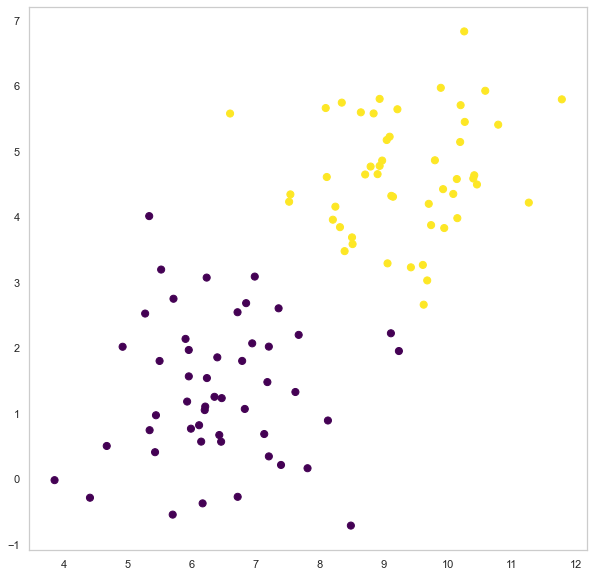

In [5]:
# Plot the data
sns.set()
sns.set_style("whitegrid")
# set figure size
plt.figure(figsize=(10, 10))
# turn grid off
plt.grid(False)
# turn scale off
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')
plt.show()


In [6]:
# lets augument the data
X = np.c_[X, np.ones(X.shape[0])]

In [7]:
print(X[:10])

[[10.0850635   4.35004635  1.        ]
 [ 6.11302538  0.81966888  1.        ]
 [ 9.23554171  1.95209395  1.        ]
 [ 7.519972    4.23150309  1.        ]
 [ 6.2010604   1.05058773  1.        ]
 [ 7.13093136  0.68540191  1.        ]
 [10.1928101   5.14329277  1.        ]
 [ 8.20326639  3.95689153  1.        ]
 [ 7.61813666  1.32673975  1.        ]
 [ 5.95173163  1.96831913  1.        ]]


## The Gradient Descent Algorithm
There is not much difference between the perceptron algorithm and the batch gradient descent algorithm. The only difference is that we will calculate the gradient of the cost function for each training example, but instead of updating the weights on the go we will store the sum of gradients and once we have iterated through all the samples we will then update the weights.

In [8]:
def batchGD(X, y, w_init=None, eta=0.5, epochs=1000):
    """
    Perceptron learning algorithm.

    Parameters
    ----------
    X : array-like, shape = [n_samples, n_features]
        Training vector, where n_samples in the number of samples and
        n_features is the number of features.
    y : array-like, shape = [n_samples]
        Target vector relative to X.
    eta : float
        Learning rate (between 0.0 and 1.0)
    epochs : int
        Passes over the training dataset.

    Returns
    -------
    w : array-like, shape = [n_features + 1]
        Weights after fitting.
    errors : list
        Number of misclassifications in every epoch.

    """
    if w_init is None:
        w = np.zeros(X.shape[1])
    else:
        w = w_init

    errors = []
    weights = []
    for epoch in range(epochs):
        e = 0
        delta = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * y[i]) <= 0:
                delta -= X[i] * y[i]
                e += 1
        w -= eta * delta
        errors.append(e)
        # print("W=", w)
        weights.append(list(w))
        # print("-----------------------------")
        # print(weights)
        if epoch % 10 == 0:
            print("epoch: ", epoch, "error: ", e)
        if e == 0:
            break
    print("epoch: ", epoch, "error: ", e)

    return weights, errors

In [9]:
weights, errors = batchGD(X, y, eta=0.01, epochs=1000)
#print(weights)

epoch:  0 error:  100
epoch:  10 error:  17
epoch:  20 error:  42
epoch:  30 error:  22
epoch:  40 error:  26
epoch:  50 error:  23
epoch:  60 error:  20
epoch:  70 error:  22
epoch:  80 error:  19
epoch:  90 error:  20
epoch:  100 error:  26
epoch:  110 error:  17
epoch:  120 error:  15
epoch:  130 error:  27
epoch:  140 error:  16
epoch:  150 error:  23
epoch:  160 error:  22
epoch:  170 error:  22
epoch:  180 error:  21
epoch:  190 error:  16
epoch:  200 error:  16
epoch:  210 error:  20
epoch:  220 error:  15
epoch:  230 error:  21
epoch:  240 error:  15
epoch:  250 error:  20
epoch:  260 error:  18
epoch:  270 error:  19
epoch:  280 error:  19
epoch:  290 error:  17
epoch:  300 error:  19
epoch:  310 error:  15
epoch:  320 error:  9
epoch:  330 error:  8
epoch:  340 error:  9
epoch:  350 error:  18
epoch:  360 error:  7
epoch:  370 error:  7
epoch:  380 error:  7
epoch:  390 error:  33
epoch:  400 error:  13
epoch:  410 error:  12
epoch:  420 error:  13
epoch:  430 error:  14
epoc

## Visualizing the learning
We will now plot the decision boundary learnt during each epoch. This will give is a good idea of how the parameters are being learnt. This thing can be done even after learning each data point but that would create too many plots and so we have not done that here.

If the number of epochs is high the indivisual plots will not be generated in that case the gif is a good way to refer.

In [10]:
# using the weights to plot the decision boundary
if len(weights) < 100:
    columns = 7
    rows = len(weights) // columns + 1
    fig, ax = plt.subplots(rows, columns, figsize=(50, 50))
    for i in range(len(weights)):
        w = weights[i]
        x1 = np.linspace(0, 15, 2)
        x2 = -(w[0] * x1 + w[2]) / w[1]
        ax[i//7, i%7].plot(x1, x2)
        # plt the data
        ax[i//7, i%7].scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')
        # turn grid off
        ax[i//7, i%7].grid(False)
    

    # remove the empty subplots
    for i in range(rows):
        for j in range(columns):
            if ax[i, j].has_data() == False:
                ax[i, j].axis('off')



## Visualisation (Max Pro Ultra :)
Looking at curves of loss and the decision boundary not only helps us understand that algorithm is working properly but also give us the feel of the working of the algorithm. So we have moved out of the way to create a Gif of the learning process. 

We have created multiple images which are the instances after each epoch and also plotted the loss plot till that epoch. We have then combined those images to create a gif of the learning process. The gif is basically the animation of the learning process. 

The best part is none of this is static, i.e. changing the data set will automatically learn the new data, generate new images and make a new gif based on it.



In [11]:
# creating each plot and saving it
import os
import shutil
path = os.path.join(os.getcwd(), 'plots-02')
if not os.path.exists(path):
    os.makedirs(path)
    
# remove the old plots from plot folder
for filename in os.listdir('plots-02'):
    file_path = os.path.join('plots-02', filename)
    try:
        if os.path.isfile(file_path) or os.path.islink(file_path):
            os.unlink(file_path)
        elif os.path.isdir(file_path):
            shutil.rmtree(file_path)
    except Exception as e:
        print('Failed to delete %s. Reason: %s' % (file_path, e))
# save the plots
for i in range(len(weights)):
    w = weights[i]
    x1 = np.linspace(0, 15, 2)
    x2 = -(w[0] * x1 + w[2]) / w[1]
    # plot two subplots in one figure
    # one for data and other for the loss function
    fig, ax1 = plt.subplots(figsize=(15, 15))
    ax1.plot(x1, x2)
    ax1.scatter(X[:, 0], X[:, 1], s=100, c=y, cmap='viridis')
    ax1.grid(False)
    # remove axis scale numbers not the border
    ax1.set_yticklabels([])
    ax1.set_xticklabels([])
    # add iteration number
    ax1.text(0.1, 0.3, str(i), fontsize=50, horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes)
    # plot errors till current iteration
    l, b, h, w = .15, .65, .2, .3
    ax2 = fig.add_axes([l, b, w, h])
    # define x axis to be same for all plots
    ax2.set_xlim(0, len(errors))
    ax2.plot(errors[:i+1])
    ax2.set_xlabel('epoch')
    ax2.set_ylabel('error')
    

    # write the current loss value
    ax2.text(0.4, 0.6, 'loss: %.2f' % errors[i], fontsize=20,
             horizontalalignment='center', verticalalignment='center',
             transform=ax2.transAxes)
   
    ax2.axis('off')

    ax2.grid(False)


    filename = os.path.join(path, str(i) + '.png')
    plt.savefig(filename)
    plt.savefig(filename, dpi=100)
    # clear the plot
    plt.clf()
    plt.close()
    


In [12]:
# delete the old perceptron.gif
for filename in os.listdir('.'):
    if filename == 'batchGD.gif':
        os.remove(filename)


# create a gif from the plots
import imageio
images = []
filenames = [filename for filename in os.listdir('plots-02')]
# sort the filenames based on the iteration number
filenames.sort(key=lambda x: int(x.split('.')[0]))
for filename in filenames:
    images.append(imageio.imread(os.path.join('plots-02', filename)))


imageio.mimsave('batchGD.gif', images, duration=0.1)




### The GIF
We have used he HTML library to show the created GIF.

In [13]:
# show the gif
import matplotlib.animation as animation
from IPython.display import HTML


# display the gif

HTML('<img src="{}">'.format('batchGD.gif'))


### The final decision boundary
The final decision boundary is the one which is learnt after the last epoch. 

Obervations:
- The data is linear separable, so the perceptron is able to learn the decision boundary and separate the data.
- The decision boundary is not very general, infact its passing very close to one of the samples, as perceptron algorithm has no way to learn a general decision boundary which is mid way between two samples because if the loss turning zero as soon as all samples are correctly classified.

Possible Improvements:
- The perceptron algorithm is not very general, it can learn a general decision boundary which is mid way between two samples.
- Few modifications can be made to the algorithm to make it more general.
- Algorithms like SVM can be used to learn a general decision boundary.



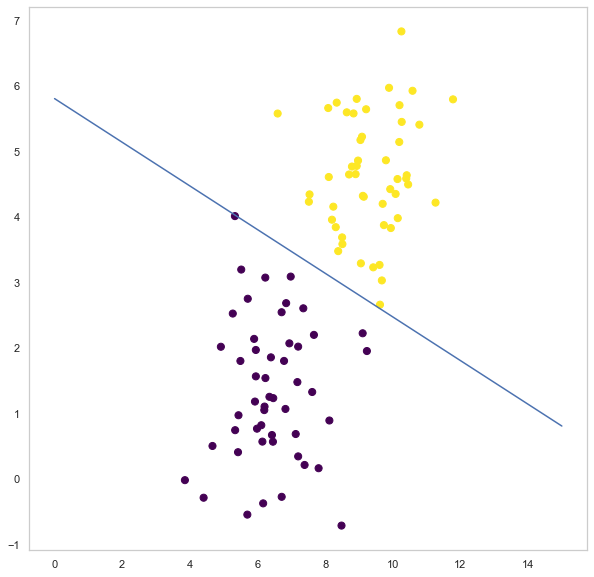

In [14]:
# final plot of the data and the decision boundary
plt.figure(figsize=(10, 10))
plt.grid(False)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')
w = weights[-1]
x1 = np.linspace(0, 15, 2)
x2 = -(w[0] * x1 + w[2]) / w[1]
plt.plot(x1, x2)
plt.show()
